## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.403260 -0.333094  1.214096 -1.567023 -0.559464 -1.677164
1  1.338211 -1.056360 -0.779852  0.366246 -0.798365 -0.038491
2 -1.166388  0.663149  1.095735 -0.793370  0.555812 -0.575536
3 -1.354023  1.413326 -1.395997  0.128367  0.514554 -0.100620
4 -0.628488 -0.124465 -1.329272  0.768964  0.432089  0.552194


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9697819	total: 58ms	remaining: 57.9s
1:	learn: 0.9600463	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9495682	total: 59.6ms	remaining: 19.8s
3:	learn: 0.9400592	total: 60.2ms	remaining: 15s
4:	learn: 0.9312661	total: 60.8ms	remaining: 12.1s
5:	learn: 0.9205677	total: 61.4ms	remaining: 10.2s
6:	learn: 0.9094662	total: 61.9ms	remaining: 8.78s
7:	learn: 0.9000867	total: 62.4ms	remaining: 7.74s
8:	learn: 0.8922811	total: 63.7ms	remaining: 7.01s
9:	learn: 0.8832076	total: 64.2ms	remaining: 6.36s
10:	learn: 0.8733685	total: 64.7ms	remaining: 5.81s
11:	learn: 0.8633611	total: 65.1ms	remaining: 5.36s
12:	learn: 0.8535302	total: 65.5ms	remaining: 4.97s
13:	learn: 0.8461082	total: 65.9ms	remaining: 4.64s
14:	learn: 0.8398486	total: 66.5ms	remaining: 4.37s
15:	learn: 0.8315713	total: 67.1ms	remaining: 4.12s
16:	learn: 0.8223250	total: 67.5ms	remaining: 3.9s
17:	learn: 0.8144136	total: 68.1ms	remaining: 3.71s
18:	learn: 0.8083140	total: 68.5ms	remaining: 3.5

104:	learn: 0.3752430	total: 110ms	remaining: 935ms
105:	learn: 0.3725640	total: 111ms	remaining: 938ms
106:	learn: 0.3692733	total: 112ms	remaining: 934ms
107:	learn: 0.3663451	total: 112ms	remaining: 929ms
108:	learn: 0.3634162	total: 113ms	remaining: 923ms
109:	learn: 0.3605573	total: 113ms	remaining: 917ms
110:	learn: 0.3578779	total: 114ms	remaining: 911ms
111:	learn: 0.3547698	total: 114ms	remaining: 906ms
112:	learn: 0.3516895	total: 115ms	remaining: 900ms
113:	learn: 0.3490522	total: 115ms	remaining: 895ms
114:	learn: 0.3461675	total: 116ms	remaining: 889ms
115:	learn: 0.3431347	total: 116ms	remaining: 883ms
116:	learn: 0.3402929	total: 116ms	remaining: 878ms
117:	learn: 0.3375170	total: 117ms	remaining: 872ms
118:	learn: 0.3345989	total: 117ms	remaining: 866ms
119:	learn: 0.3322720	total: 117ms	remaining: 861ms
120:	learn: 0.3298322	total: 118ms	remaining: 856ms
121:	learn: 0.3272213	total: 118ms	remaining: 851ms
122:	learn: 0.3250691	total: 119ms	remaining: 847ms
123:	learn: 

265:	learn: 0.1192812	total: 186ms	remaining: 514ms
266:	learn: 0.1185217	total: 187ms	remaining: 513ms
267:	learn: 0.1177765	total: 187ms	remaining: 512ms
268:	learn: 0.1169289	total: 188ms	remaining: 511ms
269:	learn: 0.1161143	total: 188ms	remaining: 509ms
270:	learn: 0.1152996	total: 189ms	remaining: 508ms
271:	learn: 0.1145057	total: 189ms	remaining: 506ms
272:	learn: 0.1137079	total: 189ms	remaining: 505ms
273:	learn: 0.1129656	total: 190ms	remaining: 503ms
274:	learn: 0.1122339	total: 190ms	remaining: 502ms
275:	learn: 0.1114452	total: 191ms	remaining: 501ms
276:	learn: 0.1106536	total: 191ms	remaining: 500ms
277:	learn: 0.1098886	total: 192ms	remaining: 499ms
278:	learn: 0.1091646	total: 192ms	remaining: 497ms
279:	learn: 0.1086065	total: 193ms	remaining: 496ms
280:	learn: 0.1079114	total: 194ms	remaining: 497ms
281:	learn: 0.1072730	total: 195ms	remaining: 495ms
282:	learn: 0.1066893	total: 195ms	remaining: 494ms
283:	learn: 0.1061446	total: 196ms	remaining: 494ms
284:	learn: 

475:	learn: 0.0372308	total: 293ms	remaining: 323ms
476:	learn: 0.0369939	total: 294ms	remaining: 322ms
477:	learn: 0.0369304	total: 294ms	remaining: 321ms
478:	learn: 0.0367490	total: 295ms	remaining: 321ms
479:	learn: 0.0365254	total: 295ms	remaining: 320ms
480:	learn: 0.0363634	total: 296ms	remaining: 319ms
481:	learn: 0.0361356	total: 296ms	remaining: 318ms
482:	learn: 0.0359127	total: 297ms	remaining: 318ms
483:	learn: 0.0358075	total: 297ms	remaining: 317ms
484:	learn: 0.0356488	total: 298ms	remaining: 316ms
485:	learn: 0.0354314	total: 298ms	remaining: 315ms
486:	learn: 0.0352186	total: 299ms	remaining: 315ms
487:	learn: 0.0351179	total: 299ms	remaining: 314ms
488:	learn: 0.0349103	total: 299ms	remaining: 313ms
489:	learn: 0.0348126	total: 300ms	remaining: 312ms
490:	learn: 0.0345605	total: 301ms	remaining: 312ms
491:	learn: 0.0344084	total: 301ms	remaining: 311ms
492:	learn: 0.0342594	total: 302ms	remaining: 310ms
493:	learn: 0.0340610	total: 302ms	remaining: 310ms
494:	learn: 

631:	learn: 0.0175407	total: 369ms	remaining: 215ms
632:	learn: 0.0174581	total: 370ms	remaining: 214ms
633:	learn: 0.0173599	total: 370ms	remaining: 214ms
634:	learn: 0.0172800	total: 371ms	remaining: 213ms
635:	learn: 0.0171802	total: 371ms	remaining: 212ms
636:	learn: 0.0170918	total: 372ms	remaining: 212ms
637:	learn: 0.0170601	total: 372ms	remaining: 211ms
638:	learn: 0.0169841	total: 373ms	remaining: 210ms
639:	learn: 0.0169209	total: 373ms	remaining: 210ms
640:	learn: 0.0168607	total: 373ms	remaining: 209ms
641:	learn: 0.0167645	total: 374ms	remaining: 209ms
642:	learn: 0.0167337	total: 374ms	remaining: 208ms
643:	learn: 0.0167035	total: 375ms	remaining: 207ms
644:	learn: 0.0166304	total: 375ms	remaining: 207ms
645:	learn: 0.0165689	total: 376ms	remaining: 206ms
646:	learn: 0.0165106	total: 376ms	remaining: 205ms
647:	learn: 0.0164242	total: 377ms	remaining: 205ms
648:	learn: 0.0163960	total: 377ms	remaining: 204ms
649:	learn: 0.0163248	total: 378ms	remaining: 203ms
650:	learn: 

858:	learn: 0.0074086	total: 475ms	remaining: 78ms
859:	learn: 0.0073901	total: 476ms	remaining: 77.5ms
860:	learn: 0.0073525	total: 477ms	remaining: 76.9ms
861:	learn: 0.0073158	total: 477ms	remaining: 76.3ms
862:	learn: 0.0072806	total: 477ms	remaining: 75.8ms
863:	learn: 0.0072408	total: 478ms	remaining: 75.2ms
864:	learn: 0.0072020	total: 478ms	remaining: 74.7ms
865:	learn: 0.0071690	total: 479ms	remaining: 74.1ms
866:	learn: 0.0071578	total: 479ms	remaining: 73.5ms
867:	learn: 0.0071291	total: 480ms	remaining: 73ms
868:	learn: 0.0070939	total: 480ms	remaining: 72.4ms
869:	learn: 0.0070609	total: 481ms	remaining: 71.9ms
870:	learn: 0.0070237	total: 481ms	remaining: 71.3ms
871:	learn: 0.0070128	total: 482ms	remaining: 70.7ms
872:	learn: 0.0069814	total: 482ms	remaining: 70.2ms
873:	learn: 0.0069555	total: 483ms	remaining: 69.6ms
874:	learn: 0.0069344	total: 483ms	remaining: 69ms
875:	learn: 0.0069235	total: 484ms	remaining: 68.5ms
876:	learn: 0.0068983	total: 484ms	remaining: 67.9ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

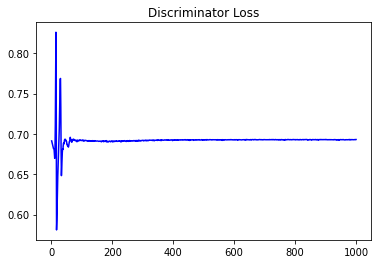

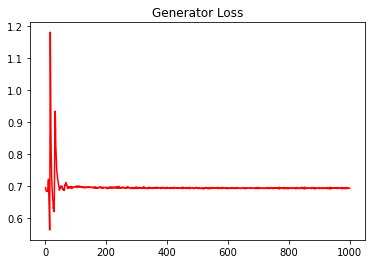

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0456914994910121


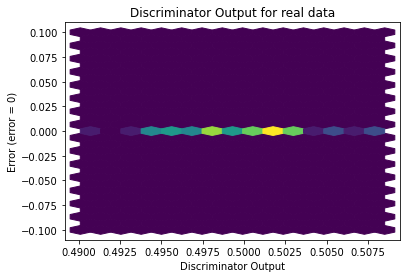

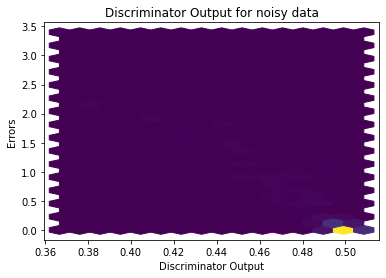

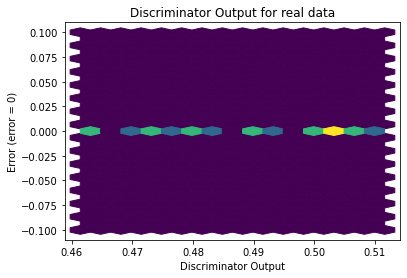

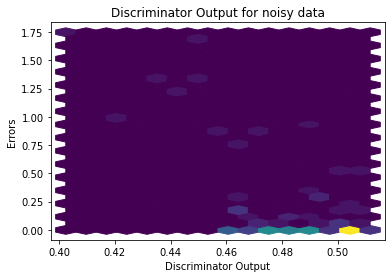

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


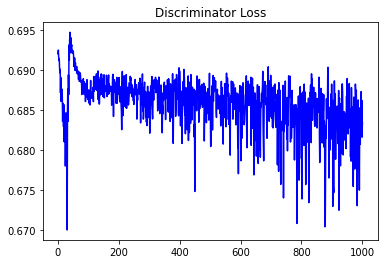

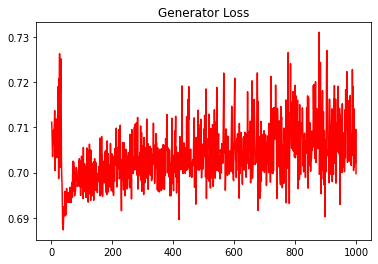

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.04042921645473671


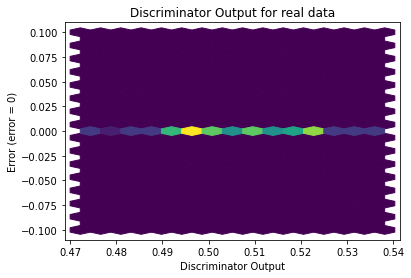

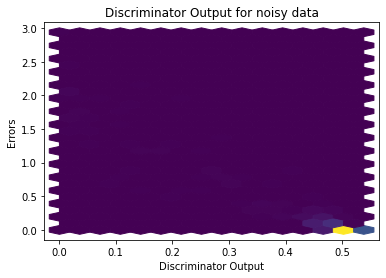

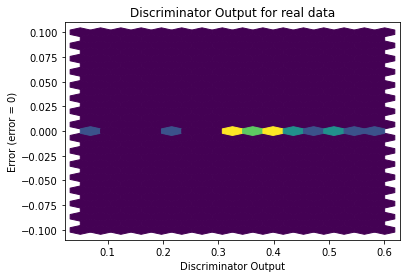

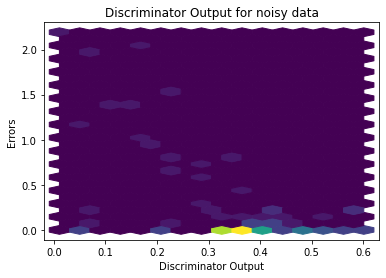

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1901]], requires_grad=True)
